# Template to perform a simple stereographic plot

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

>> Function definition START

In [2]:
def Arc_Bat(ztype='isol1000') :

        locpath='./'
        locfile='Bathymetry.nc'
        fieldbat=Dataset(locpath+locfile)
        lon  = np.squeeze(fieldbat.variables['nav_lon'])
        lat  = np.squeeze(fieldbat.variables['nav_lat'])
        My_var = np.squeeze(fieldbat.variables['Bathymetry'])

        spval = 0.
        My_var= np.ma.masked_where(My_var <= spval,My_var)

        if ztype == 'isol1000' :
                vmin=1000. ; vmax=2000.
                contours=[1000.]
                limits=[vmin,vmax]
                myticks=[1000.]
        elif ztype == 'isol1500' :
                vmin=1500. ; vmax=2000.
                contours=[1500.]
                limits=[vmin,vmax]
                myticks=[1500.]
        elif ztype == 'isomonarc' :
                vmin=500. ; vmax=4000.
                contours=[500.,2000.,4000.]
                limits=[vmin,vmax]
                myticks=[500.,2000.,4000.]
        elif ztype == 'isol500' :
                vmin=500. ; vmax=500.
                contours=[500.]
                limits=[vmin,vmax]
                myticks=[500.]
        else:
                vmin=0. ; vmax=8000.
                contours=[100.,500.,1000.,2000.,3000.,3500.,4000.]
                limits=[vmin,vmax]
                myticks=[100.,500.,1000.,2000.,3000.,3500.,4000.]

        #
        rcParams['text.latex.unicode']=True
        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')
        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
        pal = plt.cm.get_cmap('binary')
        X,Y = m(lon,lat)

        # contour (optional)
        CS2 = m.contour(X, Y, My_var, linewidths=0.5,levels=contours, colors='grey', alpha=0.8)
        plt.clabel(CS2, CS2.levels, inline=True, fmt='%.0f', fontsize=3)

        return m, X, Y


In [3]:
def Arc_plot(lon,lat,tab,contours,limits,myticks=None,name=None,zmy_cblab=None,zmy_cmap=None,filename='test.pdf',zvar=None):
        #
# Les 2 lignes suivantes posent un probleme a l'execution lie a LaTex ....
#       rcParams['text.usetex']=True
#       rcParams['text.latex.unicode']=True
        rcParams['font.family']='serif'

        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')

        if zvar == 'sivolu' or zvar == 'siconc'  or zvar == 'ssh' or zvar == 'FWC' :
                zfontsize=10.
        else:
                zfontsize=6.

        if zvar != 'Bathy' :
                m.drawparallels(np.arange(-90.,91.,5.),labels=[False,False,False,False], size=zfontsize, linewidth=0.3)
                m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True], size=zfontsize, latmax=90.,linewidth=0.3)
                m.fillcontinents(color='grey',lake_color='white')

        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])

        if zmy_cmap != None :
                pal = zmy_cmap
        else:
                pal = plt.cm.get_cmap('coolwarm')
                #pal = plt.cm.get_cmap('terrain')

        X,Y = m(lon,lat)
        C = m.contourf(X,Y,tab,contours,cmap=pal,norm=norm,extend='both')
        if zvar == 'ssh':
                CS=m.contour(X, Y, tab, linewidths=0.5, levels=npy.arange(limits[0],limits[1],5.), colors='k', alpha=0.4)

        ############################################################################################################
        ############################################################################################################
        moorplot=1
        if moorplot == 1 :
                bx_ARCB={'name':'B'  ,'lon_min':-150.,'lon_max':-150.,'lat_min':78.,'lat_max':78.}
                bx_ARCM={'name':'M1' ,'lon_min': 125.,'lon_max': 125.,'lat_min':78.,'lat_max':78.}
                bx_EURA={'name':'EUR','lon_min':  60.,'lon_max':  60.,'lat_min':85.,'lat_max':85.}

                All_box=[bx_ARCB,bx_EURA]
                for box in All_box:
                        lats = [box['lat_min'],box['lat_max']]
                        lons = [box['lon_min'],box['lon_max']]
                        x,y = m(lons,lats)
                        m.scatter(x,y,1,marker='o', color='r')
                        #m.plot(x,y,linewidth=2, color='g')
        ############################################################################################################
        ############################################################################################################

        # colorbar      
        if myticks is None:
                cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8)
        else:
                if zvar == 'votemper' or zvar == 'vosaline' or zvar == 'sivolu' :
                        cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8,drawedges=True)
                else:
                        cbar = plt.colorbar(C,format='%.0f',orientation='vertical',shrink=0.8,drawedges=True)

                cbar.set_label(zmy_cblab,fontsize=zfontsize)
                cl = plt.getp(cbar.ax, 'ymajorticklabels')
                plt.setp(cl, fontsize=zfontsize)

        plt.title(name,fontsize=zfontsize)

        return

>> Function definition END

In [4]:
# Ref experiment data
DATA_PATH='/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-REF02-MEAN/CLIM-2005-2014/'
ds_ssh=xr.open_mfdataset(DATA_PATH+'CREG12.L75-REF02.5d_gridT_y2005-2014.nc',autoclose=True)

# Mask of the grid
#grid_dir='./'
#ds_mask=xr.open_dataset(grid_dir+'CREG025.L75_byte_mask.nc')
#ds_mask
#ds_bathy=xr.open_dataset(DATA_PATH+'Bathymetry.nc')
#ds_bathy

In [19]:
ds_ssh.set_coords(['nav_lat','nav_lon'])

<xarray.Dataset>
Dimensions:       (deptht: 75, time_counter: 1, x: 1580, y: 1801)
Coordinates:
    nav_lon       (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
    nav_lat       (y, x) float32 dask.array<shape=(1801, 1580), chunksize=(1801, 1580)>
  * deptht        (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time_counter  (time_counter) datetime64[ns] 2009-12-31T12:11:44
Dimensions without coordinates: x, y
Data variables:
    votemper      (time_counter, deptht, y, x) float32 dask.array<shape=(1, 75, 1801, 1580), chunksize=(1, 75, 1801, 1580)>
    vosaline      (time_counter, deptht, y, x) float32 dask.array<shape=(1, 75, 1801, 1580), chunksize=(1, 75, 1801, 1580)>
    ssh           (time_counter, y, x) float32 dask.array<shape=(1, 1801, 1580), chunksize=(1, 1801, 1580)>
    mldkz5        (time_counter, y, x) float32 dask.array<shape=(1, 1801, 1580), chunksize=(1, 1801, 1580)>
    mldr10_1      (time_counter, y, x) float32 dask.array<shape=(1

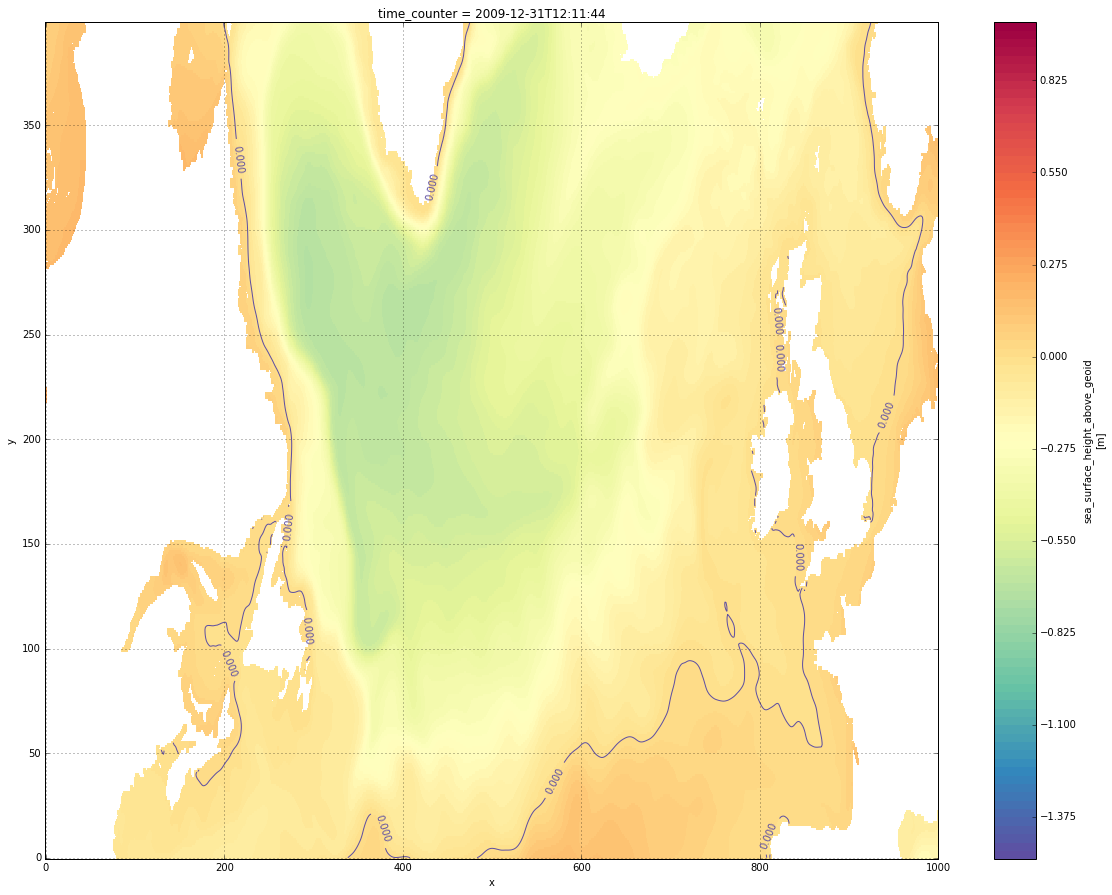

In [21]:
plt.figure(figsize=(20,15))
ds_ssh.ssh.isel(x=slice(200,1200),y=slice(250,650)).plot(vmin=-1.5,vmax=1.,levels=101, cmap='Spectral_r')
C=ds_ssh.ssh.isel(time_counter=0,x=slice(200,1200),y=slice(250,650)).plot.contour(levels=[0.,], cmap='Spectral_r')
plt.clabel(C)

#plt.contour(ds_ssh.ssh.isel(time_counter=0,x=slice(200,1200),y=slice(250,650)),levels=[0.,],color='k')
#ds_ssh.ssh.sel(nav_lon=slice(-180.,160),nav_lat=slice(60.,90.)).plot(vmin=-0.5,vmax=0.5,cmap='spectral')
plt.grid(True)
#plt.savefig('./CREG12.L75-REF02_SSH_Clim_y2005201_CanadArchi.png',dpi=150)
#plt.savefig('./CREG12.L75-REF02_SSH_Clim_y2005201.png',dpi=150)